# Introduction to 2D plots

This notebook demonstrates how plot some latitude by longitude maps of some key surface variables. Most features are available in the preinstalled `geog0111` environment. 

But updated plotting that removes white meridional lines around the Greenwich Meridian, requires the `geog0121` virtual environment. Instructions about how to install this environment (using `conda` and the `environment.yml` file) are provided in the handbook.

### Import packages and define fucntions for calculations

In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# UKESM's El Nino temperature pattern
Here we use the CVDP output files to plot the temperature response to an El Nino. First we will load in the data

In [5]:
#ON THE GEOGRAPHY CLUSTER
directory='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_historical.vsObs' 
filename='%s/UKESM1-0-LL_PresentDay.cvdp_data.1850-2014.nc'%(directory)

In [15]:
#ON YOUR OWN MACHINE
directory='Data' 
filename='%s/UKESM1-0-LL_PresentDay.cvdp_data.1850-2014.nc'%(directory)
import os
import urllib
if not os.path.isfile(filename):
    print('Downloading %s' %(filename))
    !mkdir Data
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1-0-LL_PresentDay.cvdp_data.1850-2014.nc", filename)    


A subdirectory or file Data already exists.


In [17]:
# load files
expt_file=xr.open_dataset(filename,decode_times=False)
# load the coordinates
lat=expt_file['lat']
lon=expt_file['lon']
# load the variables themselves
enso_pattern=expt_file.nino34_spacomp_tas_djf1

Then we will specify the colorscale and map

In [18]:
#temperatures
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale
cmap_limits=[-5,5]
bounds = np.linspace(cmap_limits[0], cmap_limits[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

Now we will make a global plot of the El Nino pattern

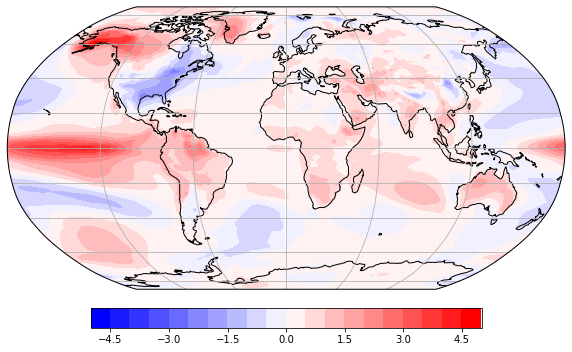

In [19]:
# Choose the map and projection
projection = ccrs.Robinson()
transform=ccrs.PlateCarree()

# Plot the axes
plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

# Make the actual figure
fig=ax.contourf(lon,lat,enso_pattern,levels=bounds, transform=transform,cmap=cmap,norm=norm)

# Alter the color bar for the map
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)


And then lets zoom into a smaller region of it

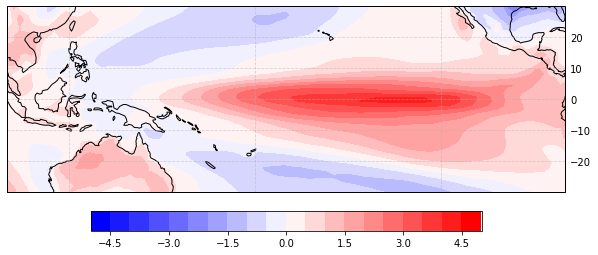

In [20]:
#Regional map
region=[100,280,-30,30] #[lon_min,lon_max,lat_min,lat_max]

# note the specification of the central longitude, so that is spans the dateline
projection = ccrs.PlateCarree(central_longitude=180., globe=None)
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER

fig=ax.contourf(lon,lat,enso_pattern,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

#plt.savefig(figname)

# Seasonal precipitation anomalies

The CVDP files can be used to create maps of the changes in seasonal precipitation. First we select the variable

In [26]:
#seasonal precipitation anomalies
variable_name='pr_spatialmean_djf'
expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]
diff=expt_a-expt_b

Then we define the colormap, and give it a non-linear interval

In [27]:
#precipitations
cmap=plt.get_cmap('BrBG') #define colormap

#define colormap's range and scale
bounds = [-5,-2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,2,5]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

Then we can create a global map with...

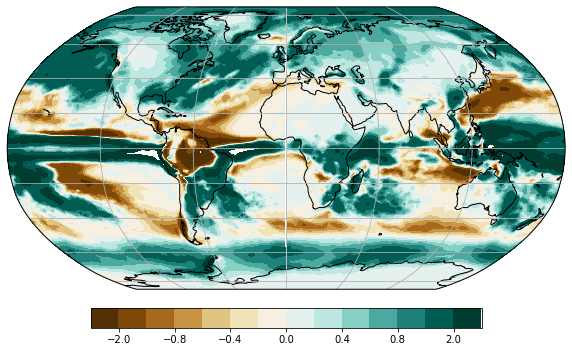

In [28]:
#Global map

projection = ccrs.Robinson()
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

Or a regional map with...

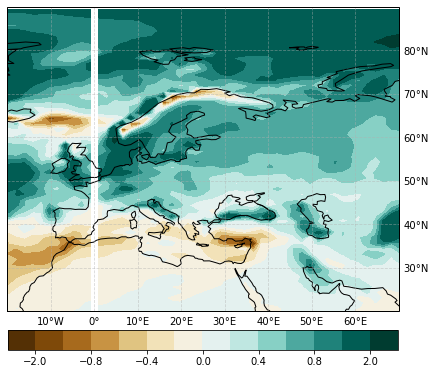

In [29]:
#Regional map
region=[-20,70,20,90] #[lon_min,lon_max,lat_min,lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)



If your regional plot (like this one) happens to cross the Greenwich meridian, then you will end up with a white line going straight up the middle of your regional plot. This can be fixed by adding a "cyclic point" to loop the data around the globe. To understand this, think about how you need to overlap the wrapping paper on a present to cover it completely. 

There is a function in python to do this, but unfortunately it doesn't come in the standard version of python. This function is in the cell below.

You will need to make your own virtual environment called `geog0121` using conda and the yml file provided. If you have not down this, then when you run the code below it will fail with the following error message... 
> TypeError: invalid indexer array

In [30]:
diff, lon = add_cyclic_point(diff, coord=lon)